In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [430]:
from sklearn.datasets import load_diabetes

In [431]:
diabetes = load_diabetes()

In [432]:
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target, columns=['target'])

In [433]:
diabetes = pd.concat([X, y], axis=1)

In [434]:
diabetes.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [435]:
##age: yaş
##sex: cinsiyet (erkek = 1, kadın = 0)
##bmi: vücut kitle indeksi
##bp: kan basıncı
##s1: T-Cells (bir tür beyaz kan hücresi) için bir ölçüt
##s2: düşük yoğunluklu lipoprotein (kolesterol türü)
##s3: yüksek yoğunluklu lipoprotein (kolesterol türü)
##s4: tiroide bağlı globulin
##s5: serum kreatinin
##s6: serum insülini

##target : bir kişinin bir yıl içindeki diyabet hastalığı için tıbbi masraflarının ortalama değeri

In [436]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [437]:
corr_matrix = diabetes.corr()

In [438]:
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

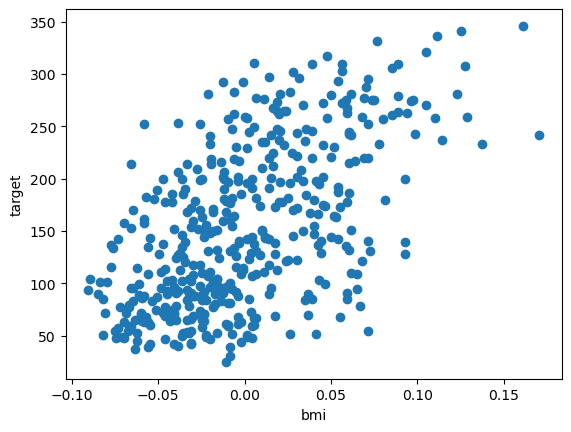

In [439]:
plt.scatter(diabetes.bmi,diabetes.target)
plt.xlabel("bmi")
plt.ylabel("target")
plt.show()

In [440]:
##en yüksek korelasyon bmi özniteliği ile ancak değer 1' çok yakın değil bu yüzden bu veri seti ile basit lineer regresyon uygulanırsa model perdormansı düşük olacaktır

In [441]:
X = diabetes.bmi.values
X

array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
       -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
       -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
       -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
       -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
       -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
        0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
       -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
       -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
       -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
       -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
       -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
       -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
       -0.02452876, -0.01806189, -0.01482845, -0.02991782, -0.04

In [442]:
X.shape

(442,)

In [443]:
X = diabetes.bmi.values.reshape(-1,1)
y = diabetes.target.values.reshape(-1,1)

In [444]:
y.shape

(442, 1)

In [445]:
X.shape

(442, 1)

In [446]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [447]:
linear_reg.fit(X,y)

LinearRegression()

y = b0 + b1*X

In [448]:
b0 = linear_reg.intercept_ ## kesim noktası
b0

array([152.13348416])

In [449]:
b1 = linear_reg.coef_ ## eğim
b1

array([[949.43526038]])

In [450]:
y_head = linear_reg.predict(X)

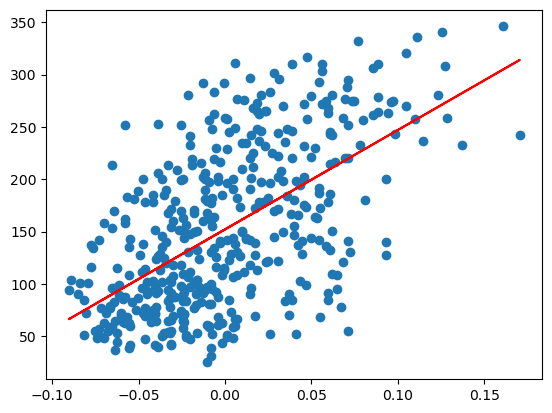

In [451]:
plt.plot(X,y_head,color="red")
plt.scatter(X,y)
plt.show()

In [452]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y, y_head)

0.3439237602253803

In [453]:
mean_squared_error(y, y_head)

3890.4565854612724

In [454]:
## model performansı kötü çıktı çünkü bu veri seti basit lineer regresyona uygun değil

Multi Linner Regression

In [455]:
X = diabetes[["bmi","s5","bp"]]
X

,bmi,s5,bp
0,0.061696,0.019908,0.021872
1,-0.051474,-0.068330,-0.026328
2,0.044451,0.002864,-0.005671
3,-0.011595,0.022692,-0.036656
4,-0.036385,-0.031991,0.021872
...,...,...,...
437,0.019662,0.031193,0.059744
438,-0.015906,-0.018118,-0.067642
439,-0.015906,-0.046879,0.017282
440,0.039062,0.044528,0.001215


In [456]:
multi_linear_reg = LinearRegression()

In [457]:
multi_linear_reg.fit(X,y)

LinearRegression()

In [458]:
y_head = multi_linear_reg.predict(X)

In [459]:
r2_score(y, y_head)

0.48008281990946056

In [460]:
mean_squared_error(y, y_head)

3083.0490338631253

In [461]:
## multi linner regresyon ile modelin performasnı biraz arttı

Polynomial Regression

In [462]:
from sklearn.preprocessing import PolynomialFeatures

In [463]:
X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
y = np.array([2,10,20,40,45,60,75,75,100,170,180,275,325,370,460,510,600,650,680,700])

In [464]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.reshape(-1,1))

In [465]:
polynomial_linear_reg = LinearRegression()
polynomial_linear_reg.fit(X_poly, y)

LinearRegression()

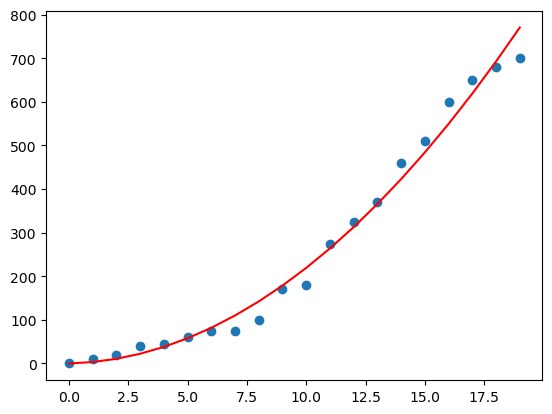

In [466]:
plt.scatter(X,y)
plt.plot(X,polynomial_linear_reg.predict(X_poly), color="red")
plt.show()